# Data Analyzation of Rotational Experiment

## Rotational Experiment

The aim of the rotational experiment is to measure the anisotropy of speed of the light caused by the putative Lorentz violation.

Two resonators were placed on a rotational table. One is placed vertically, the other horizontally. 
If we assume that Lorentz violation exists, then the frequencies of two resonators would differ by $\delta v_0$, which has several frequency components: $2\omega_R$, $\omega_\oplus$, and $\Omega_\oplus$.  
$\omega_R$ is the rotational frequency of the experimental table. $\omega_\oplus$ is the sidereal frequency and $\Omega_\oplus$ is the annual frequency.
Coefficients in Lorentz violation theory can be obtained from these frequency components.

At each time $t$, we measure the difference of the two resonance frequencies $\delta V(t)$ (Volt) and the angle of the rotational table $\phi_R(t)$.
From $\delta V(t)$, $\phi_R(t)$, and $t$, we analysed the Lorentz violation coeffiecients through Least Square fitting of each frequency component.

Currently, we use Demodulated Least Square fitting method.

## Data analyzation using Demodulated Least Square (DLS)
### Introduction to Ordinary Least Square (OLS) Regression
If we assume that there is a linear relation between observable $y$ and independent variable $x$:
\begin{equation}
y = \beta_0 + \beta_1x_1 + \beta_2x_2
\end{equation}

Define 
$\beta = \begin{pmatrix}
\beta_0 & \beta_1 & \beta_2
\end{pmatrix}$

From data sets $Y$ and $X$, OLS gives the estimated $\beta$ :
\begin{equation}
    \beta = \frac{X^TY}{X^TX}
\end{equation}


### DLS method in rotational experiment
There are two stages in DLS method. In the first stage, we demodulate the $2\omega_R$ components using OLS. In the second stage, we extract the other components.
Compared to using OLS for all components, DLS increases the speed of analyzation. This is because most of the data is averaged in the first stage since $2\omega_R$ is the largest frequency component.

We can express $\delta v_0(t)$ as a function of $\omega_R$:
\begin{equation}
\frac{\delta v_0(t)}{v_0(t)} = A(t) + B(t)t + S(t)sin(2\omega_Rt + \phi) + C(t)cos(2\omega_Rt + \phi)
\end{equation}
while S(t) and C(t) contains rest of the frequency components.

#### 1st DLS stage
Since what we measured is $\delta V(t)$ instead of $\delta v_0(t)$, $\phi_R(t)$ instead of $\omega_R(t)$.

Followed the above equation, the relation between the $\delta V(t)$ and $\phi_R(t)$ is:
\begin{equation}
\delta V(t) = A(t) + B(t)t+ S(t)sin(2\phi_R(t)) + C(t)cos(2\phi_R(t))
\end{equation}

#### 2st DLS stage
To be continue ...


# Data Analyse Python Program
## Importing Libraries
1. numpy for manipulating data as matrix.
2. matplotlib for plotting figures
3. pandas for loading and exporting data

In [1]:
# This file is for conducting the 1st stage of DLS
# Zeyu 17 July 2017

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Function for demodulating the subset
### Description of function
This function is for demodulating the $2\omega_R$ frequency component. Since the rest of the frequency is so small compared to the raw data acquisitoin frequency, the raw data is averaged through subsets. The size subset is usually determined by the number of rotations inside.

Input of the function: a subset of the raw data contains: index N, time $t$, angle $\phi_R$, and voltage $\delta V$. 

Subset structure: 
$
\begin{bmatrix}
N_i& t_i& \phi_{Ri}& \delta V_i \\
...& ... & ... & ... \\
N_j& t_j& \phi_{Rj}& \delta V_j
\end{bmatrix}
$

These variables follow:
\begin{equation}
\delta V = \beta_0 + \beta_1sin(\phi_R) + \beta_2cos(\phi_R) + \beta_3sin(2\phi_R) + \beta_4cos(2\phi_R)
\end{equation}
We ignore the linear drifting because it's too small. 
We also added $\omega_R$ component. This is because at $\omega_R$, there is a systemetic error from magnetic field of earth.

We define serveral new variables:
\begin{align}
x_0 &= 1\\
x_1 &= sin(\phi_R)\\
x_2 &= cos(\phi_R)\\
x_3 &= sin(2\phi_R)\\
x_4 &= cos(2\phi_R)
\end{align}
so that 
\begin{equation}
\delta V = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4.
\end{equation}

$\delta V,\ x_0,\ x_1,\ x_2,\ x_3,\ x_4$ are vectors with length $(j-i+1)$ while $\beta_0,\  \beta_1,\ \beta_2,\ \beta_3,\ \beta_4$ are fitting parameters (scales).

For simplicity, we define:
\begin{equation}
X = \begin{pmatrix}
       &    &    &    &    \\
    x0 & x1 & x2 & x3 & x4 \\
       &    &    &    &    
    \end{pmatrix}
,\ 
\beta = \begin{pmatrix}
        \beta_0 \\
        \beta_1 \\
        \beta_2 \\
        \beta_3 \\
        \beta_4
        \end{pmatrix}.
\end{equation}

So
\begin{equation}
\delta V = X \beta + \epsilon
\end{equation}
where $\epsilon$ is the error term.

### Terminology of OLS
Relation between independent variable $X$ and observation $Y$:
\begin{equation}
Y = X \beta + \epsilon
\end{equation}
where $\beta$ is the estimated parameters and $\epsilon$ is the error of the fit.

The least squares estimate gives us:
\begin{equation}
\beta = \frac{X^TY}{X^TX}
\end{equation}

Variance matrix of $\beta$ is:
\begin{equation}
V(\beta) = \frac{\sigma^2}{X^TX}
\end{equation}
where $\sigma$ is the standard deviation of the residual $\epsilon$.

The diagonal element of $V(\beta)$ can be used to calculate the standard deviation of $\beta$:
\begin{equation}
\sigma(\beta) = \sqrt{diag(V(\beta))}
\end{equation}

### Time scale of $\beta$
$\beta$ and $\sigma(\beta)$ are the function of time. But since $\beta$ contains only the frequencies of $\omega_\oplus$ and $\Omega_\oplus$, we take them to be a constant during one subset (if the subset is not too large). So the $\beta$ of each subset is set to be at the time $t_m$, which is the mean time of the subset.

### Description of function output
The output of demodulate function is a DataFrame object, params. It has four columns: beta, sigma, time, and Nsamples. 
The fitting parameters $\beta$ are stored in column beta for each subset. Their standard deviation, $\sigma(\beta)$, are stored in column sigma, the averaged time $t_m$ is stored in column time, the number of raw data in the subset is stored in column Nsamples.

Illustration of the output dataframe:


|              beta              |                     sigma                     |   time  |    Nsamples    |
|--------------------------------|-----------------------------------------------|---------|----------------|
|   [$\beta_{0}$...$\beta_{4}$]  |  [$\sigma(\beta_{0})$...$\sigma(\beta_{4})$]  |  $t_m$  |  $N_{sample}$  |


In [2]:
def demodulate(subset):
    """
    Given a subset of signal [index, timetag, angle, delta_V], fitting it by equation (stated in OLS section). 
    Return parameters include [theta, standard deviation, averaged time]
    """
    # initialization
    N = subset[:,0]
    t = subset[:,1]
    phi_R = subset[:,2]
    delta_V = subset[:,3]
    
    # creating matrix X
    X = np.zeros([subset.shape[0],5])
    X[:,0] = 1
    X[:,1] = np.sin(phi_R)
    X[:,2] = np.cos(phi_R)
    X[:,3] = np.sin(2*phi_R)
    X[:,4] = np.cos(2*phi_R)
    
    # perform OLS
    varcov = np.linalg.inv(np.dot(X.T, X))  # inverted inner product of X
    beta = np.dot(varcov, np.dot(X.T,delta_V))  # fitting parameters
    
    res = np.inner(beta.T, X) - delta_V  # residual
    dres = np.std(res)  # standard deviation of the residual
    
    V_beta = dres * dres * varcov  # variance matrix of fitting parameters
    sigma_beta = np.sqrt(np.diag(V_beta))  # standard deviation for fitting parameters
    
    # calculate the mean time for all these parameters
    t_mean = np.mean(t)  # average time for the subset
    
    # calculate the number of samples inside the subset
    N_sample = np.size(N)
    
    # packing all parameters in one vector
    params = pd.DataFrame([[beta, sigma_beta, t_mean, N_sample]],columns=['beta','sigma','time','Nsamples'])
    
    return params
    

## Function: select_param
Normally, we use demodulate function to create a set of parameters in dataframe. We do this for numbers of subsets and concatenate the output parameters as a dataframe object, *params_df*. It's not that easy to select a certain parameters from it without some trick. This function helps you to select a certain parameter, *param*, from *params_df* and convert it into a 2D array (if possible).

Based on the output of the demodulate function. *param* could be 'beta', 'sigma', 'time', 'Nsamples'.

In [3]:
def select_param(params_df, param):
    """
    Given a params dataframe, select a certain param. Output the result as 2D narray
    """
    param_df = params_df[param]  # choose a parameter
    param_na = param_df.values  # change it to narray
    param_na = np.array(param_na.tolist())  # change it to 2D narray (tricky part)
    
    return param_na

## Read Data of Rotational Experiment
All the data files are stored in the "./Data" folder. 
Currently there are two sets of data: run8 and run9. Locations of each data file are stored in the file_location.txt.

*read_data* function reads pathname of file_location.txt as an input and returns a DataFrame object contains all the data in one set.

Data structure of the raw data:

|        $N$           |                   $t$                    |       $\phi_R$       |     $\delta V$       |
|----------------------|------------------------------------------|----------------------|----------------------|
|          ...         |                   ...                    |         ...          |         ...          |

1. N is just an index of the data set.
2. $t$ is the local time of the acquisition of the data. Unit: seconds.
3. $\phi_R$ is the angle of the rotation plate. Unit: radius.
4. $\delta V$ is measured voltage from channel 2 (PLL?). Unit: V. 
5. It scales with the frequency difference.

### Time manipulation
Because we need to measure the physical quantity in an inertial frame (the sun centered frame), we need to set a standard frame for our local coordinates. This means that all the physical quantity should be calculated from this standard frame. The sidereal phase (phase regard to the sidereal rotation of the earth), $\phi_S$, is one of the quantity we are interested in:
\begin{equation}
\phi_S = \omega_\oplus t.
\end{equation}

If our local frame coincide with the standard frame when the experiment just started, $t=0$ means $\phi_S = 0$.
However, this is highly unlikely. So that we need to add an offset, $t_0$, to the local timetag t to make sure the sidereal phase are measured in the standard frame.

So we change our local time to local sidereal time $t_s$ by adding an offset:
\begin{equation}
t_s = t + t_0
\end{equation}
and
\begin{equation}
\phi_S = \omega_\oplus t_s.
\end{equation}

Since different runs started at different time, their $t_0$ are different. Micheal calculated $t_0$ for run 8 and 9 in the file: 'UTCconversionLST.xlsx'
1. run 8: $t_0$ = 4055.8764 (s)
2. run 9: $t_0$ = 1131905 + 4055.8764 (s)


In [4]:
def read_data(location_file):
    """
    This function reads the raw data file, whose pathname are stored in the location_file.
    Return: DataFrame obejct that contains all the raw data.
    """
    # read locations of data file
    with open(location_file) as f:
        files = f.readlines()
    files = [x.strip() for x in files]  # remove the '\n' in each line.
    
    # read and concatenate each data file
    data_df = pd.DataFrame()  # for fast reading and storing data
    for location in files:
        data = pd.read_csv(location, sep='\t', header=None, index_col=False)
        data_df = pd.concat([data_df, data])  # concatenate each data
    return data_df

In [5]:
%%time 

# read run 8 data files
run8_location = './Data/File_location_run_8.txt' 
data_run8 = read_data(run8_location)
data_run8[1] = data_run8[1] + 4055.8764  # change time to local sidereal time

# read run 9 data files
run9_location = './Data/File_location_run_9.txt' 
data_run9 = read_data(run9_location)
data_run9[1] = data_run9[1] + 1131905 + 4055.8764  # change time to local sidereal time

# concatenate run 8 and 9
data_df = pd.concat([data_run8, data_run9])
data_df = data_df.reset_index(drop='True')  # reset index
data_na = data_df.values  # data in narray datatype

CPU times: user 1min 57s, sys: 10.1 s, total: 2min 7s
Wall time: 2min 5s


# Perform OLS
1. select each subset
subset is selected based on the number of rotations
2. perform OLS on each subset
demodulate each subset based on 
\begin{equation}
\Delta V = \beta_0 + \beta_2 sin(2\omega t + \phi) + \beta_3 cos(2\omega t + \phi)
\end{equation}
linear term $\theta_1t$ is omitted.
3. store parameters

In [6]:
%%time

# initialization of looping parameters
[data_rows, data_cols] = np.shape(data_na)  
subset_rot = 2500  # number of subset_rot to demodulate
rotCounter = 0  # initialize the rotation counter
index_start = 0  # initialize the starting index for slicing a subset

# initialize variables for storing demodulated data
params_df = pd.DataFrame()

# looping through row of the data 
for i in range(1,data_rows):
    delta_angle = data_na[i][2] - data_na[i-1][2]
    if delta_angle < -4: 
        # there is a jump of the angle, this means a rotation 
        rotCounter += 1
    if rotCounter == subset_rot:
        # calculate the subset till rotCounter reaches subset_rot
        index_end = i  # the ending index for slicing a subset ('index_end' is the first candidate of the second subset)
        subset = data_na[index_start : index_end]  # creating a subset for the demodulation (slicing from 'index_start' to 'index_end - 1')
        rotCounter = 0  # reset the counter to zero
        index_start = i  # reset the starting index 
        
        # demodulate the subset
        params = demodulate(subset)
        
        # storing demodulated parameters
        params_df = pd.concat([params_df, params])
        
params_df = params_df.reset_index(drop='True')  # reset index

CPU times: user 21min 19s, sys: 26 s, total: 21min 45s
Wall time: 3min 37s


## Visualizing parameters
Parameters are stored in *params_df* structured like this:  

| index |              beta              |                     sigma                     |   time  |    Nsamples    |
|-------|--------------------------------|-----------------------------------------------|---------|----------------|
|  ...  |           ...                  |                   ...                         |   ...   |      ...       |
|  433  |  [$\beta_{0}$...$\beta_{4}$]   |  [$\sigma(\beta_{0})$...$\sigma(\beta_{4})$]  |  $t_m$  |  $N_{sample}$  |
|  ...  |           ...                  |                   ...                         |   ...   |      ...       |

Steps:
1. visualize the average time ($t_m$ vs. index).
2. visualize the re-sample process ($N_{sample}$ vs. $t_m$ ).
3. visualize offset $\beta_0$ with uncertainty, $\sigma(\beta_0)$ ($\beta_0$ vs. $t_m$).
4. visualize each frequency component $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$ with corresponding uncertainty. ($\beta_i$ vs. $t_m$)



### 1. Visualize $t_m$

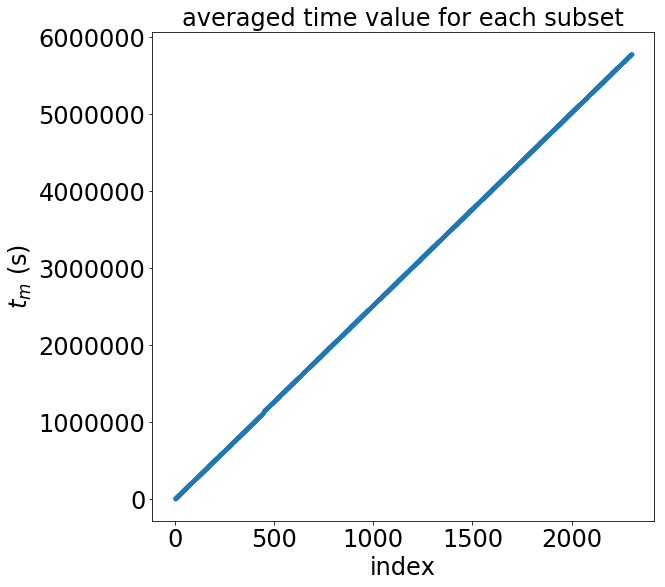

In [7]:
# obtain t_m and index from params_df
t_m = select_param(params_df, 'time')  
index = params_df.index.values

# plotting t_m against index
f, ax = plt.subplots(figsize=(9,9))
ax.plot(index, t_m, '.')
ax.set_xlabel('index', fontsize=24)
ax.set_ylabel('$t_m$ (s)', fontsize=24)
ax.set_title('averaged time value for each subset', fontsize=24)
ax.tick_params(labelsize=24)
plt.show()

### 2. Visualize $N_{sample}$

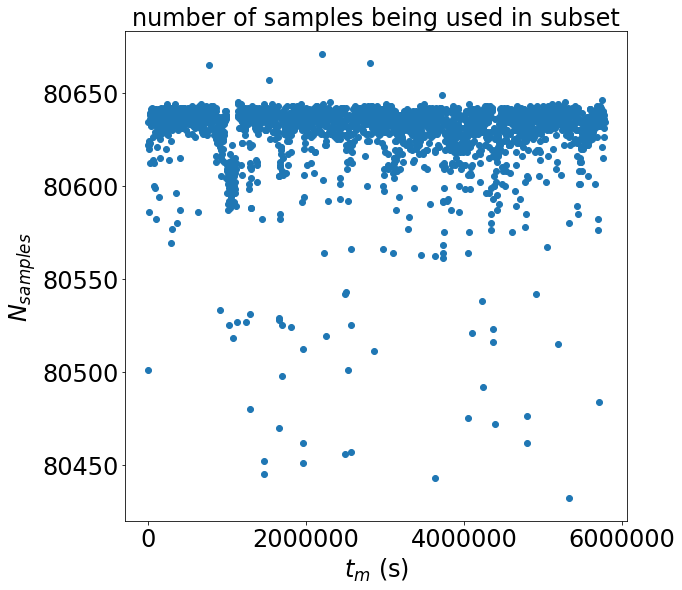

In [8]:
# obtain N_sample from params_df
Nsamples = select_param(params_df, 'Nsamples')  

# plotting Nsamples against t_m
f, ax = plt.subplots(figsize=(9,9))
ax.plot(t_m, Nsamples, 'o')
ax.set_xlabel('$t_m$ (s)', fontsize=24)
ax.set_ylabel('$N_{samples}$', fontsize=24)
ax.set_title('number of samples being used in subset', fontsize='24')
ax.tick_params(labelsize=24)
plt.show()

### 3. Visualize $\beta$
#### calculate $\beta$

In [9]:
beta = select_param(params_df, 'beta')  # beta vector
sigma_beta = select_param(params_df, 'sigma')  # sigma vector

# create beta variables
beta_0 = beta[:,0]
beta_1 = beta[:,1]
beta_2 = beta[:,2]
beta_3 = beta[:,3]
beta_4 = beta[:,4]

# creat sigma_beta variables
sigma_beta_0 = sigma_beta[:,0]
sigma_beta_1 = sigma_beta[:,1]
sigma_beta_2 = sigma_beta[:,2]
sigma_beta_3 = sigma_beta[:,3]
sigma_beta_4 = sigma_beta[:,4]

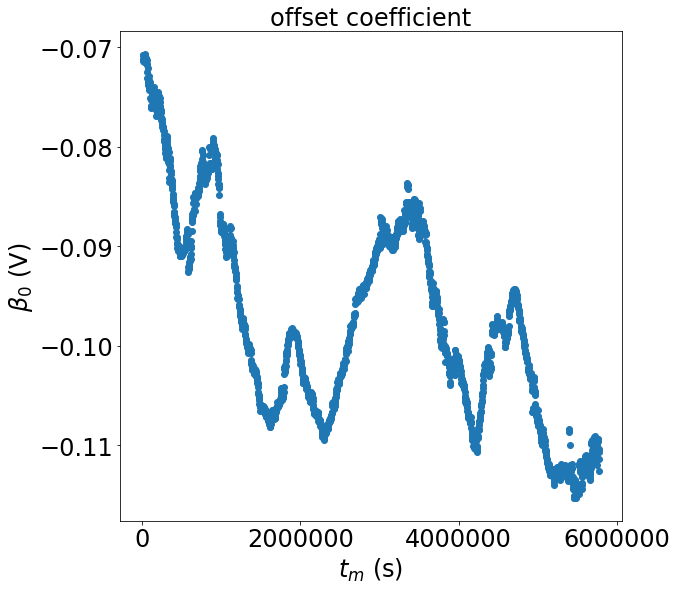

In [10]:
# plotting beta_0 against t_m
f, ax = plt.subplots(figsize=(9,9))
ax.errorbar(t_m, beta_0, fmt='o', yerr=sigma_beta_0, ecolor='g')  # error too small to be visible
ax.set_xlabel('$t_m$ (s)', fontsize=24)
ax.set_ylabel(r'$\beta_0$ (V)', fontsize=24)
ax.set_title('offset coefficient', fontsize=24)
ax.tick_params(labelsize=24)
plt.show()

#### Visualize $\beta_1$ and $\beta_2$

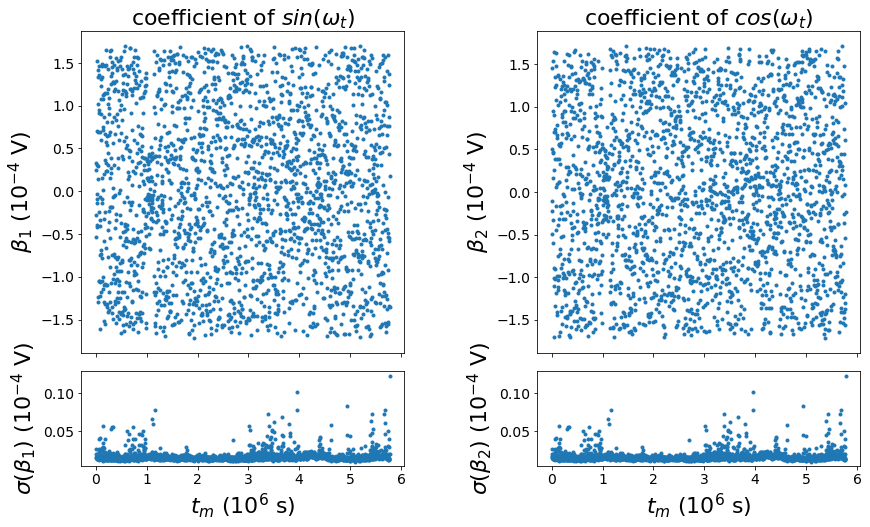

In [11]:
fig = plt.figure(figsize= (16,8))
ax1 = plt.subplot2grid((4, 8), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 8), (0, 4), colspan=3, rowspan=3)
ax3 = plt.subplot2grid((4, 8), (3, 0), colspan=3)
ax4 = plt.subplot2grid((4, 8), (3, 4), colspan=3)

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15), sharex=True)  # creating the figure object


# generating each subplot
ax1.plot(t_m * 1e-6, beta_1 * 1e4, '.')  
ax1.set_ylabel(r'$\beta_1$ ($10^{-4}$ V)', fontsize=22)
ax1.set_title('coefficient of $sin(\omega_t)$', fontsize=22)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels([])

ax2.plot(t_m * 1e-6, beta_2 * 1e4, '.')
ax2.set_ylabel(r'$\beta_2$ ($10^{-4}$ V)', fontsize=22)
ax2.set_title('coefficient of $cos(\omega_t)$', fontsize=22)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels([])

ax3.plot(t_m * 1e-6, sigma_beta_1 * 1e4, '.')  
ax3.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax3.set_ylabel(r'$\sigma(\beta_1)$ ($10^{-4}$ V)', fontsize=22)
ax3.tick_params(labelsize=14)

ax4.plot(t_m * 1e-6, sigma_beta_2 * 1e4, '.')
ax4.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax4.set_ylabel(r'$\sigma(\beta_2)$ ($10^{-4}$ V)', fontsize=22)
ax4.tick_params(labelsize=14)


plt.show()

#### Visualize $\beta_3$ and $\beta_4$

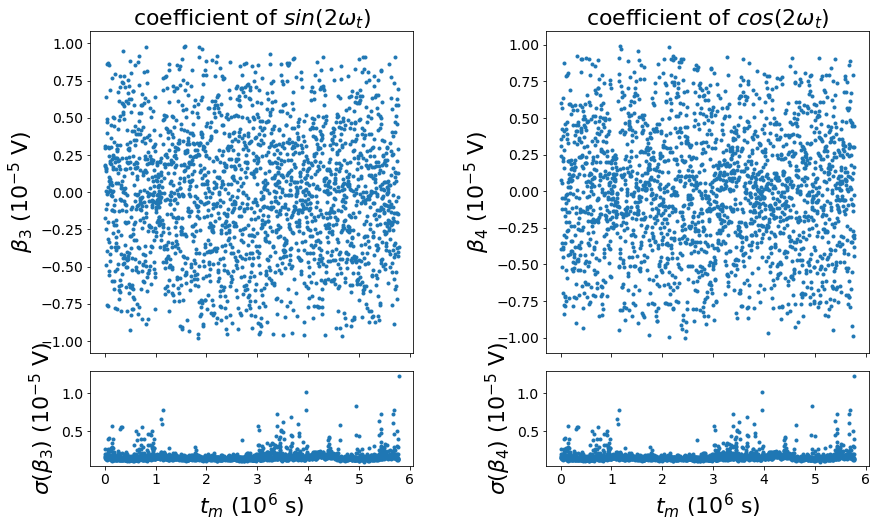

In [12]:
fig = plt.figure(figsize= (16,8))
ax1 = plt.subplot2grid((4, 8), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 8), (0, 4), colspan=3, rowspan=3)
ax3 = plt.subplot2grid((4, 8), (3, 0), colspan=3)
ax4 = plt.subplot2grid((4, 8), (3, 4), colspan=3)

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15), sharex=True)  # creating the figure object


# generating each subplot
ax1.plot(t_m * 1e-6, beta_3 * 1e5, '.')  
ax1.set_ylabel(r'$\beta_3$ ($10^{-5}$ V)', fontsize=22)
ax1.set_title('coefficient of $sin(2\omega_t)$', fontsize=22)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels([])

ax2.plot(t_m * 1e-6, beta_4 * 1e5, '.')
ax2.set_ylabel(r'$\beta_4$ ($10^{-5}$ V)', fontsize=22)
ax2.set_title('coefficient of $cos(2\omega_t)$', fontsize=22)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels([])

ax3.plot(t_m * 1e-6, sigma_beta_3 * 1e5, '.')  
ax3.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax3.set_ylabel(r'$\sigma(\beta_3)$ ($10^{-5}$ V)', fontsize=22)
ax3.tick_params(labelsize=14)

ax4.plot(t_m * 1e-6, sigma_beta_4 * 1e5, '.')
ax4.set_xlabel('$t_m$ ($10^6$ s)', fontsize=22)
ax4.set_ylabel(r'$\sigma(\beta_4)$ ($10^{-5}$ V)', fontsize=22)
ax4.tick_params(labelsize=14)


plt.show()

### Writting parameters
write some parameters in .\Data\DLS1\ 

In [13]:
write_dict = {'time': t_m, 'beta_3': beta_3, 'beta_4': beta_4, 'sigma_3': sigma_beta_3, 'sigma_4': sigma_beta_4}
write_df = pd.DataFrame(write_dict)
write_df.to_csv('./Data/DLS1/DLS1_data.txt', index=False)


## Varification
Compare with the previous DLS1 result calculated using DLS1.m
Steps:
1. reading previous result
2. visulize previous result and compare it with mine

### Reading previous result
Reading data that stores the coefficicent $\beta_3^m$ and $\beta_4^m$, which are calculated using matlab program DLS1.m.

data file location:

$\beta_3^m$: 
"/home/ubuntu1/Downloads/ipython/Zeyu/DLS/matlabProgram/Result/Sin2w_run8_9_ch2_2500.txt"

$\beta_4^m$: 
"/home/ubuntu1/Downloads/ipython/Zeyu/DLS/matlabProgram/Result/Cos2w_run8_9_ch2_2500.txt"

data structure of the first file (same for the second):

|  $N$  |          $t_s$                 |                 $\phi_S$                      |  $\beta_3^m$ |
|-------|--------------------------------|-----------------------------------------------|--------------|
|  ...  |           ...                  |                   ...                         |      ...     |

1. N is just an index of the data set.
2. $t$ is the local time of the acquisition of the data. Unit: seconds.
3. $\phi_R$ is the angle of the rotation plate. Unit: radius.
4. $\beta_3^m$ is the value of $\beta_3$ calculated by the matlab program. 

In [14]:
# initialize file names
filename_beta_3_m = "./matlabProgram/Result/Sin2w_run8_9_ch2_2500.txt"
filename_beta_4_m = "./matlabProgram/Result/Cos2w_run8_9_ch2_2500.txt"

In [15]:
# read beta_3_m
df = pd.read_csv(filename_beta_3_m, sep='\t', header=None, index_col=False)
index_m = df[0].values
sidereal_time = df[1].values
beta_3_m = df[3].values

# read beta_4_m 
# index and sidereal_time of beta_4_m should be the same as beta_3_m
df = pd.read_csv(filename_beta_4_m, sep='\t', header=None, index_col=False)
beta_4_m = df[3].values

### Comparing two results (.m vs .py)
Because I didn't get the standard deviation of the result calculated by matlab, here I only compared the value between them. We can se that before certain time, they agree well. After that, they are not perfect agree to each other. But the scale and the pattern is more or less the same. Also python result doesn't have the outliers.

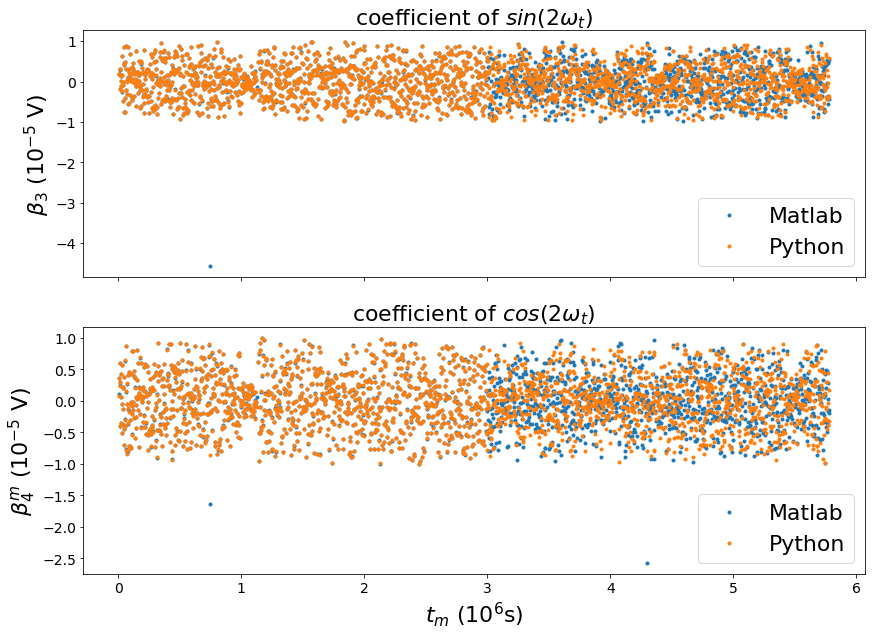

In [16]:
f, (ax1, ax2) = plt.subplots(2, figsize = (14,10), sharex=True)  # creating the figure object

# generating each subplot
ax1.plot(sidereal_time * 1e-6, beta_3_m * 1e5, '.')
ax1.plot(t_m * 1e-6, beta_3 * 1e5, '.') 
ax1.set_ylabel(r'$\beta_3$ ($10^{-5}$ V)', fontsize=22)
ax1.set_title('coefficient of $sin(2\omega_t)$', fontsize=22)
ax1.tick_params(labelsize=14)
ax1.legend(['Matlab', 'Python'], fontsize=22)

ax2.plot(sidereal_time * 1e-6, beta_4_m * 1e5, '.')  
ax2.plot(t_m * 1e-6, beta_4 * 1e5, '.') 

ax2.set_xlabel('$t_m$ ($10^6$s)', fontsize=22)
ax2.set_ylabel(r'$\beta_4^m$ ($10^{-5}$ V)', fontsize=22)
ax2.set_title('coefficient of $cos(2\omega_t)$', fontsize=22)
ax2.tick_params(labelsize=14)
ax2.legend(['Matlab', 'Python'], fontsize=22)

plt.show()

# DLS2

DLS2 takes the fitting parameters $\beta_3$ and $\beta_4$ from *params_df* (from DLS1) as well as the $t_m$ to calculate the coefficients of the others frequency.

Since currently, we are not using much data, we can only decorrelate $\omega_\oplus$ and $2\omega_\oplus$.

We convert local sidereal time, $t_m$, to local sidereal phase, $\phi_S$:
\begin{equation}
\phi_S = \omega_\oplus t_m.
\end{equation}

$\omega_\oplus$ is the sidereal frequency:
\begin{equation}
\omega_\oplus \approx \frac{2\pi}{23h\ 56m\ 4s}
\end{equation}

We reconstructed $\beta_3$ to *A_sin2w* in order to use demodulate function to fit the $\phi_S$ and $2\phi_S$. *A_sin2w* is structured like this:

|  $N$  |          $t_m$                 |                 $\phi_S$                      |   $\beta_3$  |
|-------|--------------------------------|-----------------------------------------------|--------------|
|  ...  |           ...                  |                   ...                         |      ...     |

Same as $\beta_4$, it's stored in *A_cos2w*.

In [17]:
factor_v2f = 6.65726 * 1e-8  # change the voltage to fractional frequency [unitless] [?] by multiply a factor 6.65726 * 1e-8
A_cols = 4
A_rows = params_df.shape[0]
A = np.zeros((A_rows, A_cols))
A[:,0] = params_df.index.values
A[:,1] = select_param(params_df, 'time')

w_s = 2 * np.pi / (23*3600 + 56*60 + 4)  # sidereal frequency
A[:,2] = A[:,1] * w_s

A_sin2w = A.copy()
A_sin2w[:,3] = select_param(params_df, 'beta')[:,3] * factor_v2f  # coefficeint of sin(2w) [unitless]

A_cos2w = A.copy()
A_cos2w[:,3] = select_param(params_df, 'beta')[:,4] * factor_v2f# coefficient of cos(2w) [unitless]

*A_sin2w* and *A_cos2w* are fed to *demodulate* function and the coefficients of $\omega_\oplus$ and $2\omega_\oplus$ are returned.

1. *para_S* contains $S_{c, 0}$, $S_{s,\omega_\oplus}$, $S_{c,\omega_\oplus}$, $S_{s,2\omega_\oplus}$, and $S_{c,2\omega_\oplus}$, as well as their standard deviation $\sigma(S_{s,\omega_\oplus})$ ...
2. *para_C* contains $C_{c, 0}$, $C_{s,\omega_\oplus}$, $C_{c,\omega_\oplus}$, $C_{s,2\omega_\oplus}$, and $C_{c,2\omega_\oplus}$, as well as their standard deviation $\sigma(C_{s,\omega_\oplus})$ ...



In [18]:
para_S = demodulate(A_sin2w)
para_C = demodulate(A_cos2w)

In [19]:
DLS2_co_values = {}

DLS2_co_values['S_c_0'] = para_S['beta'][0][0]
DLS2_co_values['S_s_ws'] = para_S['beta'][0][1]
DLS2_co_values['S_c_ws'] = para_S['beta'][0][2]
DLS2_co_values['S_s_2ws'] = para_S['beta'][0][3]
DLS2_co_values['S_c_2ws'] = para_S['beta'][0][4]

DLS2_co_values['C_c_0'] = para_C['beta'][0][0]
DLS2_co_values['C_s_ws'] = para_C['beta'][0][1]
DLS2_co_values['C_c_ws'] = para_C['beta'][0][2]
DLS2_co_values['C_s_2ws'] = para_C['beta'][0][3]
DLS2_co_values['C_c_2ws'] = para_C['beta'][0][4]

DLS2_co_sigma = {}

DLS2_co_sigma['S_c_0'] = para_S['sigma'][0][0]
DLS2_co_sigma['S_s_ws'] = para_S['sigma'][0][1]
DLS2_co_sigma['S_c_ws'] = para_S['sigma'][0][2]
DLS2_co_sigma['S_s_2ws'] = para_S['sigma'][0][3]
DLS2_co_sigma['S_c_2ws'] = para_S['sigma'][0][4]

DLS2_co_sigma['C_c_0'] = para_C['sigma'][0][0]
DLS2_co_sigma['C_s_ws'] = para_C['sigma'][0][1]
DLS2_co_sigma['C_c_ws'] = para_C['sigma'][0][2]
DLS2_co_sigma['C_s_2ws'] = para_C['sigma'][0][3]
DLS2_co_sigma['C_c_2ws'] = para_C['sigma'][0][4]


co_disp = {}
for key, value in DLS2_co_values.items():
    co_disp[key] = str(round(value, 17))
for key, value in DLS2_co_sigma.items():
    co_disp['sigma_' + key] = str(round(value,17))



|      $\omega_i$      |       $C_{c,\omega_i}$                                     |     $C_{s,\omega_i}$       |
|          :-          |               :-                                           |         :-                 |
|          0           | {{co_disp['C_c_0']}}($\pm${{co_disp['sigma_C_c_0']}})      |            0               |
|    $\omega_\oplus$   | {{co_disp['C_c_ws']}}($\pm${{co_disp['sigma_C_c_ws']}})    |     {{co_disp['C_s_ws']}}($\pm${{co_disp['sigma_C_s_ws']}}) |
|   $2\omega_\oplus$   | {{co_disp['C_c_2ws']}}($\pm${{co_disp['sigma_C_c_2ws']}})  |    {{co_disp['C_s_2ws']}}($\pm${{co_disp['sigma_C_s_2ws']}})|

|    $\omega_i$        |        $S_{c,\omega_i}$                                    |     $S_{s,\omega_i}$       |
|        :-            |            :-                                              |          :-                |
|        0             |    {{co_disp['S_c_0']}}($\pm${{co_disp['sigma_S_c_0']}})   |            0               |
|    $\omega_\oplus$   | {{co_disp['S_c_ws']}}($\pm${{co_disp['sigma_S_c_ws']}})    |    {{co_disp['S_s_ws']}}($\pm${{co_disp['sigma_S_s_ws']}})  |
|    $2\omega_\oplus$  | {{co_disp['S_c_2ws']}}($\pm${{co_disp['sigma_S_c_2ws']}})  |   {{co_disp['S_s_2ws']}}($\pm${{co_disp['sigma_S_s_2ws']}}) |

## Calculate EMS coefficients

In [20]:
def add_var(value1, sigma1, value2, sigma2):
    """
    This function adds two uncorrelated varibles with their values and standard error, sigmas
    It returns the total value and sigma
    """
    sigma_tot = 1 / (np.sqrt(1 / sigma1**2 + 1 / sigma2**2))
    value_tot = (value1 / sigma1**2 + value2 / sigma2**2) * sigma_tot**2
    return value_tot, sigma_tot

def sub_var(value1, sigma1, value2, sigma2):
    """
    This function subtracts two uncorrelated varibles with their values and standard error, sigmas
    'variable 1 - variable 2'.
    It returns the total value and sigma
    """
    return add_var(value1, sigma1, -value2, sigma2)

In [21]:
X = 58.014 * 2 * np.pi / 360  # colatitude of the laborotory (radius)
sin_X = np.sin(X)
cos_X = np.cos(X)

EMS_co_values = {}
EMS_co_sigma = {}

EMS_co_values['c_T_Q'] = - DLS2_co_values['C_c_0'] / (4 * sin_X**2)
EMS_co_sigma['c_T_Q'] = - DLS2_co_sigma['C_c_0'] / (4 * sin_X**2)

EMS_co_values['c_T_Y_1'] = - DLS2_co_values['C_c_ws'] / (8 * sin_X)
EMS_co_sigma['c_T_Y_1'] = - DLS2_co_sigma['C_c_ws'] / (8 * sin_X)
EMS_co_values['c_T_Y_2'] = DLS2_co_values['S_s_ws'] / (8 * sin_X * cos_X)
EMS_co_sigma['c_T_Y_2'] = DLS2_co_sigma['S_s_ws'] / (8 * sin_X * cos_X)
EMS_co_values['c_T_Y'], EMS_co_sigma['c_T_Y'] = add_var(EMS_co_values['c_T_Y_1'], EMS_co_sigma['c_T_Y_1'],
                                                        EMS_co_values['c_T_Y_2'], EMS_co_sigma['c_T_Y_2'])

EMS_co_values['c_T_X_1'] = - DLS2_co_values['C_s_ws'] / (8 * sin_X * cos_X)
EMS_co_sigma['c_T_X_1'] = - DLS2_co_sigma['C_s_ws'] / (8 * sin_X * cos_X)
EMS_co_values['c_T_X_2'] = - DLS2_co_values['S_c_ws'] / (8 * sin_X)
EMS_co_sigma['c_T_X_2'] = - DLS2_co_sigma['S_c_ws'] / (8 * sin_X)
EMS_co_values['c_T_X'], EMS_co_sigma['c_T_X'] = add_var(EMS_co_values['c_T_X_1'], EMS_co_sigma['c_T_X_1'],
                                                        EMS_co_values['c_T_X_2'], EMS_co_sigma['c_T_X_2'])

EMS_co_values['c_T_Z_1'] = DLS2_co_values['C_s_2ws'] / (2 * (1 + cos_X)**2)
EMS_co_sigma['c_T_Z_1'] = DLS2_co_sigma['C_s_2ws'] / (2 * (1 + cos_X)**2)
EMS_co_values['c_T_Z_2'] = DLS2_co_values['S_c_2ws'] / (2 * (1 + cos_X)**2)
EMS_co_sigma['c_T_Z_2'] = DLS2_co_sigma['S_c_2ws'] / (2 * (1 + cos_X)**2)
EMS_co_values['c_T_Z'], EMS_co_sigma['c_T_Z'] = add_var(EMS_co_values['c_T_Z_1'], EMS_co_sigma['c_T_Z_1'],
                                                        EMS_co_values['c_T_Z_2'], EMS_co_sigma['c_T_Z_2'])

EMS_co_values['c_T_M'], EMS_co_sigma['c_T_M'] = add_var(DLS2_co_values['C_c_2ws'], DLS2_co_sigma['C_c_2ws'], 
                                                        DLS2_co_values['S_s_2ws'], DLS2_co_sigma['S_s_2ws']) / (4 * (cos_X - 1)**2)
EMS_co_values['c_T_u'], EMS_co_sigma['c_T_u'] = sub_var(DLS2_co_values['C_c_2ws'], DLS2_co_sigma['C_c_2ws'], 
                                                        DLS2_co_values['S_s_2ws'], DLS2_co_sigma['S_s_2ws']) / (4 * (cos_X + 1)**2)

# change the EMS sigma to absolute 
for key, values in EMS_co_sigma.items():
    EMS_co_sigma[key] = abs(values)

EMS_co_values_disp = {}
for key, value in EMS_co_values.items():
    EMS_co_values_disp[key] = str(round(value, 17))

EMS_co_sigma_disp = {}
for key, value in EMS_co_sigma.items():
    EMS_co_sigma_disp[key] = str(round(value, 17))


| EMS coefficient | result 1 | result 2|
| :- | :- | :-|
| $c^T_Q$ | {{EMS_co_values_disp['c_T_Q']}}$\pm${{EMS_co_sigma_disp['c_T_Q']}}|-|
| $c^T_Y$ | {{EMS_co_values_disp['c_T_Y_1']}}$\pm${{EMS_co_sigma_disp['c_T_Y_1']}}|{{EMS_co_values_disp['c_T_Y_2']}}$\pm${{EMS_co_sigma_disp['c_T_Y_2']}}|
| $c^T_X$ | {{EMS_co_values_disp['c_T_X_1']}}$\pm${{EMS_co_sigma_disp['c_T_X_1']}}|{{EMS_co_values_disp['c_T_X_2']}}$\pm${{EMS_co_sigma_disp['c_T_X_2']}}|
| $c^T_Z$ | {{EMS_co_values_disp['c_T_Z_1']}}$\pm${{EMS_co_sigma_disp['c_T_Z_1']}}|{{EMS_co_values_disp['c_T_Z_2']}}$\pm${{EMS_co_sigma_disp['c_T_Z_2']}}|
| $c^T_M$ | {{EMS_co_values_disp['c_T_M']}}$\pm${{EMS_co_sigma_disp['c_T_M']}}|-|
| $c^T_\_$ | {{EMS_co_values_disp['c_T_u']}}$\pm${{EMS_co_sigma_disp['c_T_u']}}|-| 

#### Sum up result 1 and 2
| EMS coefficient | result |
| :- | :- | :-|
| $c^T_Q$ | {{EMS_co_values_disp['c_T_Q']}}$\pm${{EMS_co_sigma_disp['c_T_Q']}}|
| $c^T_Y$ | {{EMS_co_values_disp['c_T_Y']}}$\pm${{EMS_co_sigma_disp['c_T_Y']}}|
| $c^T_X$ | {{EMS_co_values_disp['c_T_X']}}$\pm${{EMS_co_sigma_disp['c_T_X']}}|
| $c^T_Z$ | {{EMS_co_values_disp['c_T_Z']}}$\pm${{EMS_co_sigma_disp['c_T_Z']}}|
| $c^T_M$ | {{EMS_co_values_disp['c_T_M']}}$\pm${{EMS_co_sigma_disp['c_T_M']}}|
| $c^T_\_$ | {{EMS_co_values_disp['c_T_u']}}$\pm${{EMS_co_sigma_disp['c_T_u']}}| 
